In [1]:
import re
import scipy
import string
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder            
from sklearn.svm import LinearSVC            
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier          
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Preprocessing 

In [2]:
data_patient = pd.read_csv(r'D:\patients_twoth1.csv');

## Patient file

In [3]:
data_patient.head()

,id,registered_by,registered_at,mrn,first_name,last_name,middle_name,gender,education,birth_day,...,guardian_state,guardian_city,guardian_near_by_city,guardian_address,guardian_phone_type,guardian_phone,barcode_url,qrcode_url,unidentify,external_patient_id
0,25637604,52,NaN,266565567602,sumaika,NaN,NaN,female,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False,NaN
1,25637609,52,NaN,266599458452,faheem,NaN,NaN,male,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False,NaN
2,25637612,52,NaN,266546493528,moeen,NaN,NaN,male,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False,NaN
3,25637681,52,NaN,266536153699,ali asad,NaN,NaN,male,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False,NaN
4,25637703,52,NaN,266567417192,a hadi,NaN,NaN,male,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False,NaN


In [4]:
data_patient['mrn'].count()

2320

In [5]:
data_patient['mrn'].count()

2320

In [6]:
null_values_columns = data_patient.isnull().sum() == 2320
print(null_values_columns)

id                       False
registered_by            False
registered_at             True
mrn                      False
first_name               False
last_name                False
middle_name               True
gender                   False
education                 True
birth_day                False
birth_month              False
birth_year               False
patient_nic              False
patient_passport          True
unidentify_patient       False
guardian_relationship    False
guardian_first_name      False
guardian_last_name        True
guardian_middle_name      True
guardian_nic             False
guardian_passport         True
unidentify_guardian      False
state                    False
city                     False
near_by_city             False
address1                 False
address2                  True
created_at               False
updated_at               False
phone1                   False
phone1_type              False
phone2                   False
phone2_t

In [7]:
ss = data_patient.isnull().sum() == 2320
ss

id                       False
registered_by            False
registered_at             True
mrn                      False
first_name               False
last_name                False
middle_name               True
gender                   False
education                 True
birth_day                False
birth_month              False
birth_year               False
patient_nic              False
patient_passport          True
unidentify_patient       False
guardian_relationship    False
guardian_first_name      False
guardian_last_name        True
guardian_middle_name      True
guardian_nic             False
guardian_passport         True
unidentify_guardian      False
state                    False
city                     False
near_by_city             False
address1                 False
address2                  True
created_at               False
updated_at               False
phone1                   False
phone1_type              False
phone2                   False
phone2_t

In [8]:
nullValues = list(ss[ss].index)
nullValues

['registered_at',
 'middle_name',
 'education',
 'patient_passport',
 'guardian_last_name',
 'guardian_middle_name',
 'guardian_passport',
 'address2',
 'phone2_type',
 'phone3',
 'phone3_type',
 'marital_status',
 'blood_group',
 'hiv',
 'hepatitis_b_antigens',
 'hepatitis_c',
 'guardian_state',
 'guardian_city',
 'guardian_near_by_city',
 'guardian_phone',
 'external_patient_id']

In [9]:
nuller = list(ss[ss].index)

In [10]:
nuller

['registered_at',
 'middle_name',
 'education',
 'patient_passport',
 'guardian_last_name',
 'guardian_middle_name',
 'guardian_passport',
 'address2',
 'phone2_type',
 'phone3',
 'phone3_type',
 'marital_status',
 'blood_group',
 'hiv',
 'hepatitis_b_antigens',
 'hepatitis_c',
 'guardian_state',
 'guardian_city',
 'guardian_near_by_city',
 'guardian_phone',
 'external_patient_id']

#### axis = 1 ===> to delete the whole column
#### axis = 0 ===> to delete the index

In [11]:
for i in nuller:
    data_patient.drop([i], inplace = True, axis = 1)

In [12]:
data_patient.head()

,id,registered_by,mrn,first_name,last_name,gender,birth_day,birth_month,birth_year,patient_nic,...,phone1_type,phone2,age,father_name,unidentify_gender,guardian_address,guardian_phone_type,barcode_url,qrcode_url,unidentify
0,25637604,52,266565567602,sumaika,NaN,female,13,10,2011,NaN,...,Mobile,NaN,8.0 Year,ijaz,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False
1,25637609,52,266599458452,faheem,NaN,male,13,10,2014,NaN,...,Mobile,NaN,5.0 Year,ijaz,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False
2,25637612,52,266546493528,moeen,NaN,male,13,3,2017,NaN,...,Mobile,NaN,2.6 Year,ijaz,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False
3,25637681,52,266536153699,ali asad,NaN,male,13,10,2009,NaN,...,Mobile,NaN,10.1 Year,m javed,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False
4,25637703,52,266567417192,a hadi,NaN,male,13,10,2017,NaN,...,Mobile,NaN,24.0 Month,delawar,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False


In [13]:
data_patient.head()

,id,registered_by,mrn,first_name,last_name,gender,birth_day,birth_month,birth_year,patient_nic,...,phone1_type,phone2,age,father_name,unidentify_gender,guardian_address,guardian_phone_type,barcode_url,qrcode_url,unidentify
0,25637604,52,266565567602,sumaika,NaN,female,13,10,2011,NaN,...,Mobile,NaN,8.0 Year,ijaz,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False
1,25637609,52,266599458452,faheem,NaN,male,13,10,2014,NaN,...,Mobile,NaN,5.0 Year,ijaz,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False
2,25637612,52,266546493528,moeen,NaN,male,13,3,2017,NaN,...,Mobile,NaN,2.6 Year,ijaz,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False
3,25637681,52,266536153699,ali asad,NaN,male,13,10,2009,NaN,...,Mobile,NaN,10.1 Year,m javed,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False
4,25637703,52,266567417192,a hadi,NaN,male,13,10,2017,NaN,...,Mobile,NaN,24.0 Month,delawar,False,NaN,NaN,https://ranecs-production.s3.amazonaws.com/bar...,https://ranecs-production.s3.amazonaws.com/qrc...,False


In [14]:
data_patient.drop(['id','registered_by','first_name','last_name','patient_nic','phone1_type','phone2','father_name','unidentify_gender'
                   ,'guardian_address','guardian_phone_type','barcode_url','qrcode_url'],axis=1,inplace = True)

In [15]:
data_patient.head()

,mrn,gender,birth_day,birth_month,birth_year,unidentify_patient,guardian_relationship,guardian_first_name,guardian_nic,unidentify_guardian,state,city,near_by_city,address1,created_at,updated_at,phone1,age,unidentify
0,266565567602,female,13,10,2011,False,NaN,k,0000000000000,False,Punjab,Nankana sahib,Nankana sahib,khas,2019-10-13 03:57:06 +0500,2019-10-13 04:11:05 +0500,3.007249e+09,8.0 Year,False
1,266599458452,male,13,10,2014,False,NaN,k,0000000000000,False,Punjab,Nankana sahib,Nankana sahib,khas,2019-10-13 03:58:23 +0500,2019-10-13 04:10:21 +0500,3.007249e+09,5.0 Year,False
2,266546493528,male,13,3,2017,False,NaN,k,0000000000000,False,Punjab,Nankana sahib,Nankana sahib,khas,2019-10-13 03:59:40 +0500,2019-10-13 04:08:16 +0500,3.007249e+09,2.6 Year,False
3,266536153699,male,13,10,2009,False,NaN,k,3650252527513,False,Punjab,Sahiwal,Sahiwal,74 a 5l sahiwal,2019-10-13 04:16:24 +0500,2019-11-13 12:57:32 +0500,3.436654e+09,10.1 Year,False
4,266567417192,male,13,10,2017,False,NaN,k,3520146271251,False,Punjab,Lahore,Lahore,bata pura l h r,2019-10-13 04:20:07 +0500,2019-10-13 04:24:38 +0500,3.228467e+09,24.0 Month,False


In [16]:
data_patient.drop(['unidentify_patient','guardian_relationship','guardian_first_name','guardian_nic','unidentify_guardian',
                  'created_at','updated_at','phone1','unidentify'],inplace=True,axis=1)

In [17]:
data_patient.head()

,mrn,gender,birth_day,birth_month,birth_year,state,city,near_by_city,address1,age
0,266565567602,female,13,10,2011,Punjab,Nankana sahib,Nankana sahib,khas,8.0 Year
1,266599458452,male,13,10,2014,Punjab,Nankana sahib,Nankana sahib,khas,5.0 Year
2,266546493528,male,13,3,2017,Punjab,Nankana sahib,Nankana sahib,khas,2.6 Year
3,266536153699,male,13,10,2009,Punjab,Sahiwal,Sahiwal,74 a 5l sahiwal,10.1 Year
4,266567417192,male,13,10,2017,Punjab,Lahore,Lahore,bata pura l h r,24.0 Month


In [18]:
data_patient['state'].value_counts()

Punjab                  2302
KPK                       12
Azad Jammu & Kashmir       4
Balochistan                2
Name: state, dtype: int64

In [19]:
data_patient.drop(['age','city'],inplace=True,axis=1)

In [20]:
data_patient.drop(['birth_day','birth_month'],inplace=True,axis=1)

In [21]:
data_patient.head()

,mrn,gender,birth_year,state,near_by_city,address1
0,266565567602,female,2011,Punjab,Nankana sahib,khas
1,266599458452,male,2014,Punjab,Nankana sahib,khas
2,266546493528,male,2017,Punjab,Nankana sahib,khas
3,266536153699,male,2009,Punjab,Sahiwal,74 a 5l sahiwal
4,266567417192,male,2017,Punjab,Lahore,bata pura l h r


In [22]:
data_patient.rename(columns={'near_by_city' : 'city'},inplace=True)

In [23]:
data_patient.head()

,mrn,gender,birth_year,state,city,address1
0,266565567602,female,2011,Punjab,Nankana sahib,khas
1,266599458452,male,2014,Punjab,Nankana sahib,khas
2,266546493528,male,2017,Punjab,Nankana sahib,khas
3,266536153699,male,2009,Punjab,Sahiwal,74 a 5l sahiwal
4,266567417192,male,2017,Punjab,Lahore,bata pura l h r


In [24]:
data_patient.drop(['address1'],inplace=True,axis=1)

In [25]:
data_patient.rename(columns = { 'mrn' : 'patient mrn' }, inplace = True)

In [26]:
data_patient.head()

,patient mrn,gender,birth_year,state,city
0,266565567602,female,2011,Punjab,Nankana sahib
1,266599458452,male,2014,Punjab,Nankana sahib
2,266546493528,male,2017,Punjab,Nankana sahib
3,266536153699,male,2009,Punjab,Sahiwal
4,266567417192,male,2017,Punjab,Lahore


In [27]:
data_patient.count()

patient mrn    2320
gender         2320
birth_year     2320
state          2320
city           2320
dtype: int64

In [28]:
ager = []

In [29]:
from datetime import date 
def calculateAge(birthDate): 
    today = date.today() 
    if birthDate.year < today.year:
        age = today.year - birthDate.year
        ager.append(age)

In [30]:
from datetime import date 
for i in data_patient['birth_year']:
    calculateAge(date(i,1,2))

In [31]:
ager

[11,
 8,
 5,
 13,
 5,
 3,
 15,
 3,
 3,
 13,
 4,
 7,
 28,
 41,
 3,
 3,
 10,
 7,
 7,
 3,
 3,
 3,
 3,
 11,
 5,
 68,
 48,
 53,
 30,
 27,
 45,
 24,
 24,
 5,
 33,
 32,
 26,
 22,
 27,
 28,
 31,
 43,
 38,
 28,
 23,
 25,
 27,
 56,
 31,
 47,
 36,
 23,
 33,
 30,
 53,
 26,
 10,
 38,
 31,
 31,
 36,
 27,
 27,
 27,
 29,
 33,
 31,
 26,
 37,
 35,
 27,
 52,
 31,
 48,
 25,
 25,
 35,
 35,
 25,
 24,
 28,
 40,
 41,
 23,
 45,
 28,
 25,
 43,
 28,
 27,
 38,
 21,
 7,
 10,
 17,
 3,
 3,
 7,
 3,
 33,
 63,
 38,
 23,
 23,
 48,
 33,
 37,
 53,
 42,
 28,
 33,
 31,
 30,
 31,
 32,
 28,
 55,
 53,
 38,
 48,
 35,
 33,
 35,
 32,
 29,
 24,
 28,
 40,
 36,
 58,
 24,
 53,
 46,
 43,
 25,
 44,
 48,
 3,
 45,
 33,
 33,
 27,
 33,
 29,
 63,
 24,
 48,
 28,
 3,
 25,
 11,
 27,
 43,
 37,
 52,
 4,
 3,
 3,
 7,
 3,
 23,
 3,
 7,
 3,
 12,
 5,
 5,
 5,
 38,
 3,
 3,
 12,
 3,
 3,
 6,
 8,
 11,
 9,
 3,
 3,
 9,
 3,
 5,
 3,
 6,
 5,
 10,
 7,
 11,
 16,
 3,
 3,
 6,
 15,
 6,
 3,
 6,
 8,
 3,
 3,
 4,
 5,
 4,
 15,
 10,
 18,
 3,
 3,
 3,
 3,
 3,
 22,
 9,
 8,
 

In [32]:
ager = pd.DataFrame(ager)
print(ager)

       0
0     11
1      8
2      5
3     13
4      5
...   ..
2315  26
2316  37
2317  42
2318  27
2319  32

[2320 rows x 1 columns]


In [33]:
data_patient.head()

,patient mrn,gender,birth_year,state,city
0,266565567602,female,2011,Punjab,Nankana sahib
1,266599458452,male,2014,Punjab,Nankana sahib
2,266546493528,male,2017,Punjab,Nankana sahib
3,266536153699,male,2009,Punjab,Sahiwal
4,266567417192,male,2017,Punjab,Lahore


In [34]:
ager = pd.DataFrame(ager)
# print(ager)
ager.count()
data_patient.insert(2, "Age", ager, True) 

In [35]:
data_patient.drop(['birth_year'],inplace=True,axis=1)

In [36]:
data_patient.count()

patient mrn    2320
gender         2320
Age            2320
state          2320
city           2320
dtype: int64

In [37]:
data_patient.drop(['state'], inplace=True, axis=1)

In [38]:
data_patient

,patient mrn,gender,Age,city
0,266565567602,female,11,Nankana sahib
1,266599458452,male,8,Nankana sahib
2,266546493528,male,5,Nankana sahib
3,266536153699,male,13,Sahiwal
4,266567417192,male,5,Lahore
...,...,...,...,...
2315,266634306922,female,26,Lahore
2316,266665150986,female,37,Lahore
2317,266670211059,female,42,Muridkay
2318,266668826626,female,27,Toba tek singh


## Lab file 

In [39]:
data_lab = pd.read_csv(r'D:\WAFA\lab_params1.csv')

In [40]:
data_lab.head()

,patient mrn,id,parameter_title,result1,result2,uom,range_title,lab_result_id,out_of_range,created_at,updated_at
0,266599458452,13654973,Sodium,NaN,NaN,mEq/L,138-145,1725384,True,2019-10-13 06:23:23 +0500,2019-10-13 06:23:23 +0500
1,266599458452,13654974,Potassium,NaN,NaN,mEq/L,3.4-4.7,1725384,True,2019-10-13 06:23:23 +0500,2019-10-13 06:23:23 +0500
2,266599458452,13654975,Chloride,NaN,NaN,mEq/L,95-110,1725384,True,2019-10-13 06:23:23 +0500,2019-10-13 06:23:23 +0500
3,266599458452,13654976,Calcium,NaN,NaN,U/L,8.8-10.8,1725384,True,2019-10-13 06:23:23 +0500,2019-10-13 06:23:23 +0500
4,266599458452,13654977,Magnesium,2.2,NaN,mg/dl,1.5-2.1,1725384,False,2019-10-13 06:23:23 +0500,2019-10-13 06:23:23 +0500


In [41]:
data_lab.drop(['id','result2','uom','range_title','lab_result_id','created_at','updated_at'],inplace=True,axis= 1)

In [42]:
data_lab.count()

patient mrn        71374
parameter_title    71374
result1            34273
out_of_range       71374
dtype: int64

In [43]:
data_lab.isnull().sum()

patient mrn            0
parameter_title        0
result1            37101
out_of_range           0
dtype: int64

In [44]:
data_lab = data_lab.dropna()

In [45]:
data_lab.head()

,patient mrn,parameter_title,result1,out_of_range
4,266599458452,Magnesium,2.2,False
5,266599458452,Phosphorus,6.6,False
6,266599458452,Blood Urea,10,True
7,266599458452,Creatinine,0.4,False
10,266599458452,Bilirubin Total,1.2,False


In [46]:
data_lab

,patient mrn,parameter_title,result1,out_of_range
4,266599458452,Magnesium,2.2,False
5,266599458452,Phosphorus,6.6,False
6,266599458452,Blood Urea,10,True
7,266599458452,Creatinine,0.4,False
10,266599458452,Bilirubin Total,1.2,False
...,...,...,...,...
71367,266167947618,Creatinine,1.0,False
71370,266167947618,Uric Acid,4.2,False
71371,265692022890,Blood Glucose (Random),87,False
71372,265692022890,HBsAg,NEGATIVE,True


In [47]:
data_lab.count()

patient mrn        34273
parameter_title    34273
result1            34273
out_of_range       34273
dtype: int64

In [48]:
non_floater = []
floatable=0
non_floatable=0
for i in data_lab['result1']:
    try:
        float(i)
        floatable += 1
    except ValueError:
        non_floatable = non_floatable + 1
        non_floater.append(i)

In [49]:
print('Floatble count = ' ,floatable)
print('non_floatable count = ' ,non_floatable)

Floatble count =  30815
non_floatable count =  3458


In [50]:
non_floater

['amy-cn  57',
 'QNS',
 'QNS',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'chol  339',
 'urea   34',
 'creat   1.34',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'Negative',
 'Negative',
 'Negative',
 'NEGATIVE',
 'NEGATIVE',
 'KNA',
 'REPEAT',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'KNA',
 'KNA',
 'NEGATIVE',
 'NEG

In [51]:
for i in non_floater:
    data_lab['result1'] = data_lab['result1'].replace(i,np.nan)

In [52]:
data_lab

,patient mrn,parameter_title,result1,out_of_range
4,266599458452,Magnesium,2.2,False
5,266599458452,Phosphorus,6.6,False
6,266599458452,Blood Urea,10,True
7,266599458452,Creatinine,0.4,False
10,266599458452,Bilirubin Total,1.2,False
...,...,...,...,...
71367,266167947618,Creatinine,1.0,False
71370,266167947618,Uric Acid,4.2,False
71371,265692022890,Blood Glucose (Random),87,False
71372,265692022890,HBsAg,NaN,True


In [53]:
data_lab.count()

patient mrn        34273
parameter_title    34273
result1            30815
out_of_range       34273
dtype: int64

In [54]:
data_lab = data_lab.dropna()

In [55]:
data_lab.isnull().sum()

patient mrn        0
parameter_title    0
result1            0
out_of_range       0
dtype: int64

In [56]:
data_lab['parameter_title'].value_counts()

Blood Urea              2062
SGPT (ALT)              1984
Creatinine              1977
Bilirubin Total         1835
Alkaline Phosphatase    1675
                        ... 
BUN                        1
potassium                  1
Total Protien              1
Hematocrit                 1
AST (GOT)                  1
Name: parameter_title, Length: 117, dtype: int64

In [57]:
cols_lab = data_lab['parameter_title'].value_counts() > 1000

In [58]:
cols_lab

Blood Urea               True
SGPT (ALT)               True
Creatinine               True
Bilirubin Total          True
Alkaline Phosphatase     True
                        ...  
BUN                     False
potassium               False
Total Protien           False
Hematocrit              False
AST (GOT)               False
Name: parameter_title, Length: 117, dtype: bool

In [59]:
cols_lab_obj = list(cols_lab[cols_lab].index)
cols_lab_obj

['Blood Urea',
 'SGPT (ALT)',
 'Creatinine',
 'Bilirubin Total',
 'Alkaline Phosphatase',
 'Sodium',
 'Potassium',
 'WBC',
 'Hemoglobin',
 'Lymphocytes',
 'Red Cells Count(RBC)',
 'Platelet ',
 'HCT']

In [60]:
data_lab

,patient mrn,parameter_title,result1,out_of_range
4,266599458452,Magnesium,2.2,False
5,266599458452,Phosphorus,6.6,False
6,266599458452,Blood Urea,10,True
7,266599458452,Creatinine,0.4,False
10,266599458452,Bilirubin Total,1.2,False
...,...,...,...,...
71360,266167947618,Alkaline Phosphatase,230,False
71366,266167947618,Blood Urea,28,False
71367,266167947618,Creatinine,1.0,False
71370,266167947618,Uric Acid,4.2,False


In [61]:
cols_lab_obj

['Blood Urea',
 'SGPT (ALT)',
 'Creatinine',
 'Bilirubin Total',
 'Alkaline Phosphatase',
 'Sodium',
 'Potassium',
 'WBC',
 'Hemoglobin',
 'Lymphocytes',
 'Red Cells Count(RBC)',
 'Platelet ',
 'HCT']

In [62]:
result = []
a=0
for items in cols_lab_obj:
    a = a+1
    ans = data_lab[ data_lab['parameter_title'] == items]
#     ans is a dataframe, when data is in rows and columns..then its called a dataframe
    result.append(ans)
print(result)

[        patient mrn parameter_title result1  out_of_range
6      266599458452      Blood Urea      10          True
20     266546493528      Blood Urea      23         False
34     266565567602      Blood Urea      57          True
54     266567417192      Blood Urea      49          True
77     266551545048      Blood Urea      23         False
...             ...             ...     ...           ...
71078  266630381844      Blood Urea      24         False
71203  266673673171      Blood Urea      10          True
71289  266602549530      Blood Urea      12          True
71328  266692884212      Blood Urea      12          True
71366  266167947618      Blood Urea      28         False

[2062 rows x 4 columns],         patient mrn parameter_title result1  out_of_range
12     266599458452      SGPT (ALT)      12         False
26     266546493528      SGPT (ALT)      23         False
40     266565567602      SGPT (ALT)      26         False
60     266567417192      SGPT (ALT)      20  

In [63]:
result = pd.concat(result)
print(a)

13


In [64]:
result.head()

,patient mrn,parameter_title,result1,out_of_range
6,266599458452,Blood Urea,10,True
20,266546493528,Blood Urea,23,False
34,266565567602,Blood Urea,57,True
54,266567417192,Blood Urea,49,True
77,266551545048,Blood Urea,23,False


In [65]:
result.count()

patient mrn        19453
parameter_title    19453
result1            19453
out_of_range       19453
dtype: int64

In [66]:
result['parameter_title'].value_counts()

Blood Urea              2062
SGPT (ALT)              1984
Creatinine              1977
Bilirubin Total         1835
Alkaline Phosphatase    1675
Sodium                  1668
Potassium               1657
WBC                     1107
Hemoglobin              1104
Lymphocytes             1103
Red Cells Count(RBC)    1095
Platelet                1093
HCT                     1093
Name: parameter_title, dtype: int64

# Generating different tests 

In [67]:
false_values = result[result['out_of_range'] == False]

In [68]:
false_values

,patient mrn,parameter_title,result1,out_of_range
20,266546493528,Blood Urea,23,False
77,266551545048,Blood Urea,23,False
116,266560278867,Blood Urea,35,False
161,266570902178,Blood Urea,25,False
184,266538810260,Blood Urea,13,False
...,...,...,...,...
70645,266623692252,HCT,44.53,False
70685,266652901986,HCT,38.41,False
70705,266619634241,HCT,38.64,False
70725,266623692252,HCT,43.45,False


In [69]:
false_values['parameter_title'].value_counts()

Bilirubin Total         1683
Creatinine              1485
Blood Urea              1355
SGPT (ALT)              1349
Potassium               1303
Alkaline Phosphatase     989
Sodium                   920
Red Cells Count(RBC)     739
WBC                      731
Lymphocytes              628
Platelet                 623
Hemoglobin               596
HCT                      210
Name: parameter_title, dtype: int64

In [70]:
true_values = result[ result['out_of_range'] == True]

In [71]:
true_values

,patient mrn,parameter_title,result1,out_of_range
6,266599458452,Blood Urea,10,True
34,266565567602,Blood Urea,57,True
54,266567417192,Blood Urea,49,True
93,266536153699,Blood Urea,53,True
141,266598091867,Blood Urea,171,True
...,...,...,...,...
71238,266665150986,HCT,32.63,True
71257,266665150986,HCT,32.63,True
71276,266602549530,HCT,31.71,True
71297,266665051564,HCT,31.37,True


In [72]:
true_values['parameter_title'].value_counts()

HCT                     883
Sodium                  748
Blood Urea              707
Alkaline Phosphatase    686
SGPT (ALT)              635
Hemoglobin              508
Creatinine              492
Lymphocytes             475
Platelet                470
WBC                     376
Red Cells Count(RBC)    356
Potassium               354
Bilirubin Total         152
Name: parameter_title, dtype: int64

In [73]:
kita = true_values[ true_values['parameter_title'] == 'HCT']
kita['patient mrn'].value_counts()

266586729341    13
266539365632     8
266507972195     6
266568182112     5
266576314033     5
                ..
266502828682     1
266693535369     1
266649956732     1
183301220374     1
266574365880     1
Name: patient mrn, Length: 650, dtype: int64

## Tests for class_label having value True

In [74]:
one_true = true_values[ true_values['parameter_title'] == 'HCT']
print(one_true)

        patient mrn parameter_title result1  out_of_range
383    266526335346             HCT    34.1          True
423    183345928108             HCT    23.6          True
446    183345928108             HCT    23.6          True
474    267106207458             HCT    37.3          True
521    267106207458             HCT    37.3          True
...             ...             ...     ...           ...
71238  266665150986             HCT   32.63          True
71257  266665150986             HCT   32.63          True
71276  266602549530             HCT   31.71          True
71297  266665051564             HCT   31.37          True
71315  266692884212             HCT   30.54          True

[883 rows x 4 columns]


In [75]:
one_true = one_true.rename(columns={'result1' : 'HCT_res'})
one_true.drop(['parameter_title'],inplace = True,axis = 1)
one_true = one_true.reset_index(drop = True)
one_true

,patient mrn,HCT_res,out_of_range
0,266526335346,34.1,True
1,183345928108,23.6,True
2,183345928108,23.6,True
3,267106207458,37.3,True
4,267106207458,37.3,True
...,...,...,...
878,266665150986,32.63,True
879,266665150986,32.63,True
880,266602549530,31.71,True
881,266665051564,31.37,True


In [76]:
true_values

,patient mrn,parameter_title,result1,out_of_range
6,266599458452,Blood Urea,10,True
34,266565567602,Blood Urea,57,True
54,266567417192,Blood Urea,49,True
93,266536153699,Blood Urea,53,True
141,266598091867,Blood Urea,171,True
...,...,...,...,...
71238,266665150986,HCT,32.63,True
71257,266665150986,HCT,32.63,True
71276,266602549530,HCT,31.71,True
71297,266665051564,HCT,31.37,True


In [77]:
second_true = true_values[ true_values['parameter_title'] == 'SGPT (ALT)']
second_true

,patient mrn,parameter_title,result1,out_of_range
134,266598091867,SGPT (ALT),36,True
193,266598659029,SGPT (ALT),667,True
220,266593179356,SGPT (ALT),54,True
298,266565567602,SGPT (ALT),247,True
360,266547051534,SGPT (ALT),73,True
...,...,...,...,...
70381,172406440685,SGPT (ALT),39,True
71342,267160490233,SGPT (ALT),49,True
71346,267160490233,SGPT (ALT),49,True
71350,267160490233,SGPT (ALT),49,True


In [78]:
second_true = second_true.rename(columns={'result1' : 'SGPT (ALT)_res'})
second_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
second_true = second_true.reset_index(drop = True)
second_true_val = second_true['SGPT (ALT)_res'].values
second_true_val

array(['36', '667', '54', '247', '73', '34', '35', '1852', '225', '127',
       '220', '252', '78', '203', '235', '530', '155', '134', '226', '45',
       '393', '138', '494', '110', '26', '176', '261', '343', '52', '56',
       '1821', '130', '55', '208', '1535', '101', '25', '56', '222', '91',
       '46', '133', '293', '129', '51', '1341', '136', '68', '30', '25',
       '29', '64', '75', '41', '44', '29', '121', '141', '1382', '138',
       '183', '1406', '95', '76', '41', '68', '43', '59', '53', '44',
       '125', '410', '44', '90', '1632', '532', '53', '49', '578', '72',
       '196', '58', '99', '191', '44', '124', '48', '101', '60', '164',
       '128', '68', '37', '808', '64', '70', '47', '48', '1208', '816',
       '95', '71', '36', '416', '36', '109', '90', '58', '2693', '73',
       '161', '500', '384', '80', '66', '1460', '29', '30', '30', '53',
       '1110', '51', '36', '48', '204', '327', '266', '48', '52', '41',
       '144', '76', '50', '47', '52', '108', '55', '100'

In [79]:
third_true = true_values[ true_values['parameter_title'] == 'Blood Urea']
third_true = third_true.rename(columns={'result1' : 'Blood Urea_res'})
third_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
third_true = third_true.reset_index(drop = True)
third_true_val = third_true['Blood Urea_res'].values

In [80]:
fourth_true = true_values[ true_values['parameter_title'] == 'Sodium']
fourth_true = fourth_true.rename(columns={'result1' : 'Sodium_res'})
fourth_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
fourth_true = fourth_true.reset_index(drop = True)
fourth_true_val = fourth_true['Sodium_res'].values

In [81]:
fifth_true = true_values[ true_values['parameter_title'] == 'Alkaline Phosphatase']
fifth_true = fifth_true.rename(columns={'result1' : 'Alkaline Phosphatase_res'})
fifth_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
fifth_true = fifth_true.reset_index(drop = True)
fifth_true_val = fifth_true['Alkaline Phosphatase_res'].values

In [82]:
sixth_true = true_values[ true_values['parameter_title'] == 'Hemoglobin']
sixth_true = sixth_true.rename(columns={'result1' : 'Hemoglobin_res'})
sixth_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
sixth_true = sixth_true.reset_index(drop = True)
sixth_true_val = sixth_true['Hemoglobin_res'].values

In [83]:
seventh_true = true_values[ true_values['parameter_title'] == 'Creatinine']
seventh_true = seventh_true.rename(columns={'result1' : 'Creatinine_res'})
seventh_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
seventh_true = seventh_true.reset_index(drop = True)
seventh_true_val = seventh_true['Creatinine_res'].values

In [84]:
eigth_true = true_values[ true_values['parameter_title'] == 'Lymphocytes']
eigth_true = eigth_true.rename(columns={'result1' : 'Lymphocytes_res'})
eigth_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
eigth_true = eigth_true.reset_index(drop = True)
eigth_true_val = eigth_true['Lymphocytes_res'].values

In [85]:
ninth_true = true_values[ true_values['parameter_title'] == 'Platelet ']
ninth_true = ninth_true.rename(columns={'result1' : 'Platelet_res'})
ninth_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
ninth_true = ninth_true.reset_index(drop = True)
ninth_true_val = ninth_true['Platelet_res'].values

In [86]:
tenth_true = true_values[ true_values['parameter_title'] == 'WBC']
tenth_true = tenth_true.rename(columns={'result1' : 'WBC_res'})
tenth_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
tenth_true = tenth_true.reset_index(drop = True)
tenth_true_val = tenth_true['WBC_res'].values

In [87]:
eleventh_true = true_values[ true_values['parameter_title'] == 'Red Cells Count(RBC)']
eleventh_true = eleventh_true.rename(columns={'result1' : 'Red Cells Count(RBC)_res'})
eleventh_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
eleventh_true = eleventh_true.reset_index(drop = True)
eleventh_true_val = eleventh_true['Red Cells Count(RBC)_res'].values

In [88]:
twelveth_true = true_values[ true_values['parameter_title'] == 'Potassium']
twelveth_true = twelveth_true.rename(columns={'result1' : 'Potassium_res'})
twelveth_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
twelveth_true = twelveth_true.reset_index(drop = True)
twelveth_true_val = twelveth_true['Potassium_res'].values

In [89]:
thirteen_true = true_values[ true_values['parameter_title'] == 'Bilirubin Total']
thirteen_true = thirteen_true.rename(columns={'result1' : 'Bilirubin Total_res'})
thirteen_true.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
thirteen_true = thirteen_true.reset_index(drop = True)
thirteen_true_val = thirteen_true['Bilirubin Total_res'].values

## Tests for class_label having value False

In [90]:
false_values

,patient mrn,parameter_title,result1,out_of_range
20,266546493528,Blood Urea,23,False
77,266551545048,Blood Urea,23,False
116,266560278867,Blood Urea,35,False
161,266570902178,Blood Urea,25,False
184,266538810260,Blood Urea,13,False
...,...,...,...,...
70645,266623692252,HCT,44.53,False
70685,266652901986,HCT,38.41,False
70705,266619634241,HCT,38.64,False
70725,266623692252,HCT,43.45,False


In [91]:
one_false = false_values[ false_values['parameter_title'] == 'Bilirubin Total']
one_false = one_false.rename(columns={'result1' : 'Bilirubin Total_res'})
one_false.drop(['parameter_title'],inplace = True,axis = 1)
one_false = one_false.reset_index(drop = True)
one_false

,patient mrn,Bilirubin Total_res,out_of_range
0,266599458452,1.2,False
1,266546493528,2.2,False
2,266565567602,0.3,False
3,266567417192,0.5,False
4,266551545048,1.74,False
...,...,...,...
1678,266666199048,0.65,False
1679,266609779189,0.45,False
1680,266630381844,0.65,False
1681,266673673171,0.23,False


In [92]:

###
second_false = false_values[ false_values['parameter_title'] == 'SGPT (ALT)']
second_false = second_false.rename(columns={'result1' : 'SGPT (ALT)_res'})
second_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
second_false = second_false.reset_index(drop = True)
second_false_val = second_false['SGPT (ALT)_res'].values

###
third_false = false_values[ false_values['parameter_title'] == 'Blood Urea']
third_false = third_false.rename(columns={'result1' : 'Blood Urea_res'})
third_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
third_false = third_false.reset_index(drop = True)
third_false_val = third_false['Blood Urea_res'].values

###
fourth_false = false_values[ false_values['parameter_title'] == 'Sodium']
fourth_false = fourth_false.rename(columns={'result1' : 'Sodium_res'})
fourth_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
fourth_false = fourth_false.reset_index(drop = True)
fourth_false_val = fourth_false['Sodium_res'].values
###
fifth_false = false_values[ false_values['parameter_title'] == 'Alkaline Phosphatase']
fifth_false = fifth_false.rename(columns={'result1' : 'Alkaline Phosphatase_res'})
fifth_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
fifth_false = fifth_false.reset_index(drop = True)
fifth_false_val = fifth_false['Alkaline Phosphatase_res'].values
###
sixth_false = false_values[ false_values['parameter_title'] == 'Hemoglobin']
sixth_false = sixth_false.rename(columns={'result1' : 'Hemoglobin_res'})
sixth_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
sixth_false = sixth_false.reset_index(drop = True)
sixth_false_val = sixth_false['Hemoglobin_res'].values
####
seventh_false = false_values[ false_values['parameter_title'] == 'Creatinine']
seventh_false = seventh_false.rename(columns={'result1' : 'Creatinine_res'})
seventh_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
seventh_false = seventh_false.reset_index(drop = True)
seventh_false_val = seventh_false['Creatinine_res'].values
###
eigth_false = false_values[ false_values['parameter_title'] == 'Lymphocytes']
eigth_false = eigth_false.rename(columns={'result1' : 'Lymphocytes_res'})
eigth_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
eigth_false = eigth_false.reset_index(drop = True)
eigth_false_val = eigth_false['Lymphocytes_res'].values
###
ninth_false = false_values[ false_values['parameter_title'] == 'Platelet ']
ninth_false = ninth_false.rename(columns={'result1' : 'Platelet_res'})
ninth_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
ninth_false = ninth_false.reset_index(drop = True)
ninth_false_val = ninth_false['Platelet_res'].values
###
tenth_false = false_values[ false_values['parameter_title'] == 'WBC']
tenth_false = tenth_false.rename(columns={'result1' : 'WBC_res'})
tenth_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
tenth_false = tenth_false.reset_index(drop = True)
tenth_false_val = tenth_false['WBC_res'].values

###
eleventh_false = false_values[ false_values['parameter_title'] == 'Red Cells Count(RBC)']
eleventh_false = eleventh_false.rename(columns={'result1' : 'Red Cells Count(RBC)_res'})
eleventh_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
eleventh_false = eleventh_false.reset_index(drop = True)
eleventh_false_val = eleventh_false['Red Cells Count(RBC)_res'].values
###
twelveth_false = false_values[ false_values['parameter_title'] == 'Potassium']
twelveth_false = twelveth_false.rename(columns={'result1' : 'Potassium_res'})
twelveth_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
twelveth_false = twelveth_false.reset_index(drop = True)
twelveth_false_val = twelveth_false['Potassium_res'].values

###
thirteen_false = false_values[ false_values['parameter_title'] == 'HCT']
thirteen_false = thirteen_false.rename(columns={'result1' : 'HCT_res'})
thirteen_false.drop(['parameter_title','patient mrn','out_of_range'],inplace = True,axis = 1)
thirteen_false = thirteen_false.reset_index(drop = True)
thirteen_false_val = thirteen_false['HCT_res'].values

In [93]:
one_false

,patient mrn,Bilirubin Total_res,out_of_range
0,266599458452,1.2,False
1,266546493528,2.2,False
2,266565567602,0.3,False
3,266567417192,0.5,False
4,266551545048,1.74,False
...,...,...,...
1678,266666199048,0.65,False
1679,266609779189,0.45,False
1680,266630381844,0.65,False
1681,266673673171,0.23,False


In [94]:
faller = one_false.copy()

In [95]:
second_false

,SGPT (ALT)_res
0,12
1,23
2,26
3,20
4,14
...,...
1344,26
1345,14
1346,17
1347,12


In [96]:
second_false_val

array(['12', '23', '26', ..., '17', '12', '17'], dtype=object)

In [97]:
second_false.columns[0]

'SGPT (ALT)_res'

In [98]:
faller

,patient mrn,Bilirubin Total_res,out_of_range
0,266599458452,1.2,False
1,266546493528,2.2,False
2,266565567602,0.3,False
3,266567417192,0.5,False
4,266551545048,1.74,False
...,...,...,...
1678,266666199048,0.65,False
1679,266609779189,0.45,False
1680,266630381844,0.65,False
1681,266673673171,0.23,False


In [99]:
faller[second_false.columns[0]] = pd.Series(second_false_val)
print(faller)

       patient mrn Bilirubin Total_res  out_of_range SGPT (ALT)_res
0     266599458452                 1.2         False             12
1     266546493528                 2.2         False             23
2     266565567602                 0.3         False             26
3     266567417192                 0.5         False             20
4     266551545048                1.74         False             14
...            ...                 ...           ...            ...
1678  266666199048                0.65         False            NaN
1679  266609779189                0.45         False            NaN
1680  266630381844                0.65         False            NaN
1681  266673673171                0.23         False            NaN
1682  266692884212                0.14         False            NaN

[1683 rows x 4 columns]


In [100]:
third_false_val

array(['23', '23', '35', ..., '23', '24', '28'], dtype=object)

In [101]:
faller[third_false.columns[0]] = pd.Series(third_false_val)
faller

,patient mrn,Bilirubin Total_res,out_of_range,SGPT (ALT)_res,Blood Urea_res
0,266599458452,1.2,False,12,23
1,266546493528,2.2,False,23,23
2,266565567602,0.3,False,26,35
3,266567417192,0.5,False,20,25
4,266551545048,1.74,False,14,13
...,...,...,...,...,...
1678,266666199048,0.65,False,NaN,NaN
1679,266609779189,0.45,False,NaN,NaN
1680,266630381844,0.65,False,NaN,NaN
1681,266673673171,0.23,False,NaN,NaN


In [102]:
faller[fourth_false.columns[0]] = pd.Series(fourth_false_val)
faller[fifth_false.columns[0]] = pd.Series(fifth_false_val)
faller[sixth_false.columns[0]] = pd.Series(sixth_false_val)
faller[seventh_false.columns[0]] = pd.Series(seventh_false_val)
faller[eigth_false.columns[0]] = pd.Series(eigth_false_val)
faller[ninth_false.columns[0]] = pd.Series(ninth_false_val)
faller[tenth_false.columns[0]] = pd.Series(tenth_false_val)
faller[eleventh_false.columns[0]] = pd.Series(eleventh_false_val)
faller[twelveth_false.columns[0]] = pd.Series(twelveth_false_val)
faller[thirteen_false.columns[0]] = pd.Series(thirteen_false_val)

In [103]:
faller

,patient mrn,Bilirubin Total_res,out_of_range,SGPT (ALT)_res,Blood Urea_res,Sodium_res,Alkaline Phosphatase_res,Hemoglobin_res,Creatinine_res,Lymphocytes_res,Platelet_res,WBC_res,Red Cells Count(RBC)_res,Potassium_res,HCT_res
0,266599458452,1.2,False,12,23,136,281,12.3,0.4,20,351,7.5,4.33,5.9,37.8
1,266546493528,2.2,False,23,23,137,236,13.9,0.6,34,302,9.6,4.53,4.4,37.60
2,266565567602,0.3,False,26,35,133,220,12.8,0.4,34,409,9.6,4.39,5.9,36.62
3,266567417192,0.5,False,20,25,138,284,12.8,0.7,30,409,11.23,4.39,4.0,37.13
4,266551545048,1.74,False,14,13,127,253,10.0,0.4,34,379,7.4,4.36,4.8,36.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,266666199048,0.65,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,266609779189,0.45,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,266630381844,0.65,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681,266673673171,0.23,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
faller.isnull().sum()

patient mrn                    0
Bilirubin Total_res            0
out_of_range                   0
SGPT (ALT)_res               334
Blood Urea_res               328
Sodium_res                   763
Alkaline Phosphatase_res     694
Hemoglobin_res              1087
Creatinine_res               198
Lymphocytes_res             1055
Platelet_res                1060
WBC_res                      952
Red Cells Count(RBC)_res     944
Potassium_res                380
HCT_res                     1473
dtype: int64

In [105]:
faller.count()

patient mrn                 1683
Bilirubin Total_res         1683
out_of_range                1683
SGPT (ALT)_res              1349
Blood Urea_res              1355
Sodium_res                   920
Alkaline Phosphatase_res     989
Hemoglobin_res               596
Creatinine_res              1485
Lymphocytes_res              628
Platelet_res                 623
WBC_res                      731
Red Cells Count(RBC)_res     739
Potassium_res               1303
HCT_res                      210
dtype: int64

In [106]:
one_true

,patient mrn,HCT_res,out_of_range
0,266526335346,34.1,True
1,183345928108,23.6,True
2,183345928108,23.6,True
3,267106207458,37.3,True
4,267106207458,37.3,True
...,...,...,...
878,266665150986,32.63,True
879,266665150986,32.63,True
880,266602549530,31.71,True
881,266665051564,31.37,True


In [107]:
truer = one_true.copy()

In [108]:
truer[second_true.columns[0]] = pd.Series(second_true_val)
truer[third_true.columns[0]] = pd.Series(third_true_val)
truer[fourth_true.columns[0]] = pd.Series(fourth_true_val)
truer[fifth_true.columns[0]] = pd.Series(fifth_true_val)
truer[sixth_true.columns[0]] = pd.Series(sixth_true_val)
truer[seventh_true.columns[0]] = pd.Series(seventh_true_val)
truer[eigth_true.columns[0]] = pd.Series(eigth_true_val)
truer[ninth_true.columns[0]] = pd.Series(ninth_true_val)
truer[tenth_true.columns[0]] = pd.Series(tenth_true_val)
truer[eleventh_true.columns[0]] = pd.Series(eleventh_true_val)
truer[twelveth_true.columns[0]] = pd.Series(twelveth_true_val)
truer[thirteen_true.columns[0]] = pd.Series(thirteen_true_val)

In [109]:
truer

,patient mrn,HCT_res,out_of_range,SGPT (ALT)_res,Blood Urea_res,Sodium_res,Alkaline Phosphatase_res,Hemoglobin_res,Creatinine_res,Lymphocytes_res,Platelet_res,WBC_res,Red Cells Count(RBC)_res,Potassium_res,Bilirubin Total_res
0,266526335346,34.1,True,36,10,137,408,8.2,1.3,16,2,14.4,3.08,5.4,7.7
1,183345928108,23.6,True,667,57,136,479,8.2,1.06,16,39,14.4,3.08,5.9,6.4
2,183345928108,23.6,True,54,49,129,253,4.5,1.57,9.8,97,16.1,3.57,5.1,17.9
3,267106207458,37.3,True,247,53,103,265,8.3,1.72,15,375,12.5,1.47,2.7,9.6
4,267106207458,37.3,True,73,171,132,195,9.3,1.59,14.6,428,13.71,2.16,2.8,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,266665150986,32.63,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,266665150986,32.63,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,266602549530,31.71,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,266665051564,31.37,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
truer.isnull().sum()

patient mrn                   0
HCT_res                       0
out_of_range                  0
SGPT (ALT)_res              248
Blood Urea_res              176
Sodium_res                  135
Alkaline Phosphatase_res    197
Hemoglobin_res              375
Creatinine_res              391
Lymphocytes_res             408
Platelet_res                413
WBC_res                     507
Red Cells Count(RBC)_res    527
Potassium_res               529
Bilirubin Total_res         731
dtype: int64

In [111]:
truer

,patient mrn,HCT_res,out_of_range,SGPT (ALT)_res,Blood Urea_res,Sodium_res,Alkaline Phosphatase_res,Hemoglobin_res,Creatinine_res,Lymphocytes_res,Platelet_res,WBC_res,Red Cells Count(RBC)_res,Potassium_res,Bilirubin Total_res
0,266526335346,34.1,True,36,10,137,408,8.2,1.3,16,2,14.4,3.08,5.4,7.7
1,183345928108,23.6,True,667,57,136,479,8.2,1.06,16,39,14.4,3.08,5.9,6.4
2,183345928108,23.6,True,54,49,129,253,4.5,1.57,9.8,97,16.1,3.57,5.1,17.9
3,267106207458,37.3,True,247,53,103,265,8.3,1.72,15,375,12.5,1.47,2.7,9.6
4,267106207458,37.3,True,73,171,132,195,9.3,1.59,14.6,428,13.71,2.16,2.8,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,266665150986,32.63,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,266665150986,32.63,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,266602549530,31.71,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,266665051564,31.37,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# result.pivot_table(values='val', index=result.index, columns='', aggfunc='first')

# Handling the missing values

In [113]:
from sklearn.impute import SimpleImputer
# 
my_imputer = SimpleImputer(strategy='mean')

In [114]:
my_imputer

SimpleImputer()

In [115]:
features = ['Alkaline Phosphatase_res','Bilirubin Total_res','Blood Urea_res','Creatinine_res','HCT_res','Hemoglobin_res',
           'Lymphocytes_res','Platelet_res','Potassium_res','Red Cells Count(RBC)_res','SGPT (ALT)_res','Sodium_res','WBC_res']

In [116]:
truer

,patient mrn,HCT_res,out_of_range,SGPT (ALT)_res,Blood Urea_res,Sodium_res,Alkaline Phosphatase_res,Hemoglobin_res,Creatinine_res,Lymphocytes_res,Platelet_res,WBC_res,Red Cells Count(RBC)_res,Potassium_res,Bilirubin Total_res
0,266526335346,34.1,True,36,10,137,408,8.2,1.3,16,2,14.4,3.08,5.4,7.7
1,183345928108,23.6,True,667,57,136,479,8.2,1.06,16,39,14.4,3.08,5.9,6.4
2,183345928108,23.6,True,54,49,129,253,4.5,1.57,9.8,97,16.1,3.57,5.1,17.9
3,267106207458,37.3,True,247,53,103,265,8.3,1.72,15,375,12.5,1.47,2.7,9.6
4,267106207458,37.3,True,73,171,132,195,9.3,1.59,14.6,428,13.71,2.16,2.8,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,266665150986,32.63,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,266665150986,32.63,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,266602549530,31.71,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,266665051564,31.37,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
imputed_true = my_imputer.fit_transform(truer)

In [118]:
imputed_true

array([[2.66526335e+11, 3.41000000e+01, 1.00000000e+00, ...,
        3.08000000e+00, 5.40000000e+00, 7.70000000e+00],
       [1.83345928e+11, 2.36000000e+01, 1.00000000e+00, ...,
        3.08000000e+00, 5.90000000e+00, 6.40000000e+00],
       [1.83345928e+11, 2.36000000e+01, 1.00000000e+00, ...,
        3.57000000e+00, 5.10000000e+00, 1.79000000e+01],
       ...,
       [2.66602550e+11, 3.17100000e+01, 1.00000000e+00, ...,
        3.04542135e+00, 4.27655367e+00, 1.55393421e+01],
       [2.66665052e+11, 3.13700000e+01, 1.00000000e+00, ...,
        3.04542135e+00, 4.27655367e+00, 1.55393421e+01],
       [2.66692884e+11, 3.05400000e+01, 1.00000000e+00, ...,
        3.04542135e+00, 4.27655367e+00, 1.55393421e+01]])

### handled missing values for class_label having True value


In [119]:
# handled missing values for class_label having True value
my_imputer.statistics_

array([2.60459300e+11, 2.86824349e+01, 1.00000000e+00, 2.23370079e+02,
       9.75189533e+01, 1.36287433e+02, 5.74068513e+02, 9.53047244e+00,
       3.17556911e+00, 2.61516211e+01, 2.65142553e+02, 1.38435372e+01,
       3.04542135e+00, 4.27655367e+00, 1.55393421e+01])

In [120]:
imputed_true = pd.DataFrame(imputed_true,columns=truer.columns)

In [121]:
imputed_true.isnull().sum()

patient mrn                 0
HCT_res                     0
out_of_range                0
SGPT (ALT)_res              0
Blood Urea_res              0
Sodium_res                  0
Alkaline Phosphatase_res    0
Hemoglobin_res              0
Creatinine_res              0
Lymphocytes_res             0
Platelet_res                0
WBC_res                     0
Red Cells Count(RBC)_res    0
Potassium_res               0
Bilirubin Total_res         0
dtype: int64

In [122]:
imputed_true.count()

patient mrn                 883
HCT_res                     883
out_of_range                883
SGPT (ALT)_res              883
Blood Urea_res              883
Sodium_res                  883
Alkaline Phosphatase_res    883
Hemoglobin_res              883
Creatinine_res              883
Lymphocytes_res             883
Platelet_res                883
WBC_res                     883
Red Cells Count(RBC)_res    883
Potassium_res               883
Bilirubin Total_res         883
dtype: int64

In [123]:
imputed_true.tail()

,patient mrn,HCT_res,out_of_range,SGPT (ALT)_res,Blood Urea_res,Sodium_res,Alkaline Phosphatase_res,Hemoglobin_res,Creatinine_res,Lymphocytes_res,Platelet_res,WBC_res,Red Cells Count(RBC)_res,Potassium_res,Bilirubin Total_res
878,2.666652e+11,32.63,1.0,223.370079,97.518953,136.287433,574.068513,9.530472,3.175569,26.151621,265.142553,13.843537,3.045421,4.276554,15.539342
879,2.666652e+11,32.63,1.0,223.370079,97.518953,136.287433,574.068513,9.530472,3.175569,26.151621,265.142553,13.843537,3.045421,4.276554,15.539342
880,2.666025e+11,31.71,1.0,223.370079,97.518953,136.287433,574.068513,9.530472,3.175569,26.151621,265.142553,13.843537,3.045421,4.276554,15.539342
881,2.666651e+11,31.37,1.0,223.370079,97.518953,136.287433,574.068513,9.530472,3.175569,26.151621,265.142553,13.843537,3.045421,4.276554,15.539342
882,2.666929e+11,30.54,1.0,223.370079,97.518953,136.287433,574.068513,9.530472,3.175569,26.151621,265.142553,13.843537,3.045421,4.276554,15.539342


### handled missing values for class_label having False value

In [124]:
imputed_false = my_imputer.fit_transform(faller)

In [125]:
my_imputer.statistics_

array([2.63535075e+11, 1.34748663e+00, 0.00000000e+00, 2.11971831e+01,
       2.54265683e+01, 1.37290326e+02, 1.76685541e+02, 1.10881040e+01,
       6.36781145e-01, 2.38435987e+01, 2.58670947e+02, 1.17557004e+02,
       4.24175507e+00, 4.19646969e+00, 4.05320000e+01])

In [126]:
imputed_false = pd.DataFrame(imputed_false,columns=faller.columns)

In [127]:
imputed_false.count()

patient mrn                 1683
Bilirubin Total_res         1683
out_of_range                1683
SGPT (ALT)_res              1683
Blood Urea_res              1683
Sodium_res                  1683
Alkaline Phosphatase_res    1683
Hemoglobin_res              1683
Creatinine_res              1683
Lymphocytes_res             1683
Platelet_res                1683
WBC_res                     1683
Red Cells Count(RBC)_res    1683
Potassium_res               1683
HCT_res                     1683
dtype: int64

In [128]:
# imputed_para = imputed_para.transform(combiner[features])

In [129]:
# imputed_para.columns = features

In [130]:
# my_imputer.statistics_

In [131]:
# imputed_para = pd.DataFrame(imputed_para, columns=features)
# imputed_para

In [132]:
# imputed_para.isnull().sum()

In [133]:
# imputed_para.count()

## Merging both files(imputed_true & imputed_false) 

In [134]:
# mergedStuff = pd.merge(data_patient,imputed_para , on = ['patient mrn'] , how = 'right')
# mergedStuff

In [135]:
combiner = imputed_true.append(imputed_false, sort=True)

In [136]:
combiner

,Alkaline Phosphatase_res,Bilirubin Total_res,Blood Urea_res,Creatinine_res,HCT_res,Hemoglobin_res,Lymphocytes_res,Platelet_res,Potassium_res,Red Cells Count(RBC)_res,SGPT (ALT)_res,Sodium_res,WBC_res,out_of_range,patient mrn
0,408.000000,7.70,10.000000,1.300000,34.100,8.200000,16.000000,2.000000,5.40000,3.080000,36.000000,137.000000,14.400000,1.0,2.665263e+11
1,479.000000,6.40,57.000000,1.060000,23.600,8.200000,16.000000,39.000000,5.90000,3.080000,667.000000,136.000000,14.400000,1.0,1.833459e+11
2,253.000000,17.90,49.000000,1.570000,23.600,4.500000,9.800000,97.000000,5.10000,3.570000,54.000000,129.000000,16.100000,1.0,1.833459e+11
3,265.000000,9.60,53.000000,1.720000,37.300,8.300000,15.000000,375.000000,2.70000,1.470000,247.000000,103.000000,12.500000,1.0,2.671062e+11
4,195.000000,20.90,171.000000,1.590000,37.300,9.300000,14.600000,428.000000,2.80000,2.160000,73.000000,132.000000,13.710000,1.0,2.671062e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,176.685541,0.65,25.426568,0.636781,40.532,11.088104,23.843599,258.670947,4.19647,4.241755,21.197183,137.290326,117.557004,0.0,2.666662e+11
1679,176.685541,0.45,25.426568,0.636781,40.532,11.088104,23.843599,258.670947,4.19647,4.241755,21.197183,137.290326,117.557004,0.0,2.666098e+11
1680,176.685541,0.65,25.426568,0.636781,40.532,11.088104,23.843599,258.670947,4.19647,4.241755,21.197183,137.290326,117.557004,0.0,2.666304e+11
1681,176.685541,0.23,25.426568,0.636781,40.532,11.088104,23.843599,258.670947,4.19647,4.241755,21.197183,137.290326,117.557004,0.0,2.666737e+11


In [137]:
pat_lab = pd.merge(data_patient,combiner, on='patient mrn', how='inner')

In [138]:
combiner[combiner["patient mrn"] == '2.665660e+11' ]

,Alkaline Phosphatase_res,Bilirubin Total_res,Blood Urea_res,Creatinine_res,HCT_res,Hemoglobin_res,Lymphocytes_res,Platelet_res,Potassium_res,Red Cells Count(RBC)_res,SGPT (ALT)_res,Sodium_res,WBC_res,out_of_range,patient mrn


In [139]:
data_patient

,patient mrn,gender,Age,city
0,266565567602,female,11,Nankana sahib
1,266599458452,male,8,Nankana sahib
2,266546493528,male,5,Nankana sahib
3,266536153699,male,13,Sahiwal
4,266567417192,male,5,Lahore
...,...,...,...,...
2315,266634306922,female,26,Lahore
2316,266665150986,female,37,Lahore
2317,266670211059,female,42,Muridkay
2318,266668826626,female,27,Toba tek singh


In [140]:
pat_lab

,patient mrn,gender,Age,city,Alkaline Phosphatase_res,Bilirubin Total_res,Blood Urea_res,Creatinine_res,HCT_res,Hemoglobin_res,Lymphocytes_res,Platelet_res,Potassium_res,Red Cells Count(RBC)_res,SGPT (ALT)_res,Sodium_res,WBC_res,out_of_range
0,266565567602,female,11,Nankana sahib,769.000000,8.600000,67.000000,1.100000,33.40,9.500000,6.700000,475.000000,2.700000,2.740000,36.000000,125.000000,14.900000,1.0
1,266565567602,female,11,Nankana sahib,150.000000,3.700000,59.000000,1.200000,32.40,6.500000,70.000000,120.000000,2.700000,2.370000,1110.000000,134.000000,13.600000,1.0
2,266565567602,female,11,Nankana sahib,220.000000,0.300000,35.000000,0.400000,36.62,12.800000,34.000000,409.000000,5.900000,4.390000,26.000000,133.000000,9.600000,0.0
3,266565567602,female,11,Nankana sahib,175.000000,0.700000,19.000000,0.500000,46.20,11.300000,20.000000,327.000000,4.100000,4.980000,36.000000,139.000000,10.630000,0.0
4,266565567602,female,11,Nankana sahib,165.000000,0.500000,19.000000,0.700000,43.60,11.800000,22.000000,303.000000,4.700000,4.800000,10.000000,131.000000,10.260000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,266665150986,female,37,Lahore,574.068513,15.539342,97.518953,3.175569,32.63,9.530472,26.151621,265.142553,4.276554,3.045421,223.370079,136.287433,13.843537,1.0
2562,266665150986,female,37,Lahore,574.068513,15.539342,97.518953,3.175569,32.63,9.530472,26.151621,265.142553,4.276554,3.045421,223.370079,136.287433,13.843537,1.0
2563,266670211059,female,42,Muridkay,574.068513,15.539342,97.518953,3.175569,33.80,9.530472,26.151621,265.142553,4.276554,3.045421,223.370079,136.287433,13.843537,1.0
2564,266668826626,female,27,Toba tek singh,574.068513,15.539342,97.518953,3.175569,28.75,9.530472,26.151621,265.142553,4.276554,3.045421,223.370079,136.287433,13.843537,1.0


In [141]:
mergedStuff = pat_lab.copy()

In [142]:
mergedStuff.count()

patient mrn                 2566
gender                      2566
Age                         2566
city                        2566
Alkaline Phosphatase_res    2566
Bilirubin Total_res         2566
Blood Urea_res              2566
Creatinine_res              2566
HCT_res                     2566
Hemoglobin_res              2566
Lymphocytes_res             2566
Platelet_res                2566
Potassium_res               2566
Red Cells Count(RBC)_res    2566
SGPT (ALT)_res              2566
Sodium_res                  2566
WBC_res                     2566
out_of_range                2566
dtype: int64

In [143]:
mergedStuff = mergedStuff.sample(frac=1)

In [144]:
mergedStuff = mergedStuff.sample(frac=1).reset_index(drop = True)

In [145]:
mergedStuff

,patient mrn,gender,Age,city,Alkaline Phosphatase_res,Bilirubin Total_res,Blood Urea_res,Creatinine_res,HCT_res,Hemoglobin_res,Lymphocytes_res,Platelet_res,Potassium_res,Red Cells Count(RBC)_res,SGPT (ALT)_res,Sodium_res,WBC_res,out_of_range
0,266584226942,male,10,Lahore,176.685541,0.400000,25.426568,0.636781,40.532,11.088104,23.843599,258.670947,4.196470,4.241755,21.197183,137.290326,117.557004,0.0
1,266606001861,female,53,Lahore,1079.000000,15.539342,183.000000,3.175569,32.990,9.530472,26.151621,265.142553,4.276554,3.045421,143.000000,133.000000,13.843537,1.0
2,266586729341,male,16,Lahore,176.685541,2.400000,29.000000,0.600000,40.532,11.088104,23.843599,258.670947,5.600000,4.241755,31.000000,137.290326,117.557004,0.0
3,266591059559,female,3,Lahore,343.000000,4.100000,40.000000,0.400000,40.532,12.100000,20.000000,310.000000,3.800000,4.040000,31.000000,134.000000,5.900000,0.0
4,266516486951,female,16,Lahore,521.000000,15.539342,425.000000,15.000000,25.800,8.400000,60.000000,148.000000,4.276554,3.045421,30.000000,128.000000,13.843537,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,266593986654,male,12,Lahore,104.000000,2.200000,33.000000,0.400000,38.410,6.700000,35.000000,215.000000,3.400000,4.010000,37.000000,133.000000,7.320000,0.0
2562,266528802811,male,11,Lahore,435.000000,15.539342,195.000000,3.175569,25.700,9.530472,26.151621,265.142553,4.276554,3.045421,223.370079,126.000000,13.843537,1.0
2563,266502741892,male,3,Okara,176.685541,2.160000,25.426568,0.400000,40.532,11.088104,23.843599,258.670947,4.196470,4.241755,21.197183,137.290326,117.557004,0.0
2564,266512894270,male,3,Hafizabad,176.685541,0.600000,15.000000,0.400000,40.532,11.088104,23.843599,258.670947,3.000000,4.241755,14.000000,137.290326,117.557004,0.0


# Cleaned Data

In [146]:
mergedStuff.drop(['patient mrn'],inplace=True,axis=1)

In [147]:
mergedStuff.count()

gender                      2566
Age                         2566
city                        2566
Alkaline Phosphatase_res    2566
Bilirubin Total_res         2566
Blood Urea_res              2566
Creatinine_res              2566
HCT_res                     2566
Hemoglobin_res              2566
Lymphocytes_res             2566
Platelet_res                2566
Potassium_res               2566
Red Cells Count(RBC)_res    2566
SGPT (ALT)_res              2566
Sodium_res                  2566
WBC_res                     2566
out_of_range                2566
dtype: int64

In [148]:
mergedStuff.isnull().sum()

gender                      0
Age                         0
city                        0
Alkaline Phosphatase_res    0
Bilirubin Total_res         0
Blood Urea_res              0
Creatinine_res              0
HCT_res                     0
Hemoglobin_res              0
Lymphocytes_res             0
Platelet_res                0
Potassium_res               0
Red Cells Count(RBC)_res    0
SGPT (ALT)_res              0
Sodium_res                  0
WBC_res                     0
out_of_range                0
dtype: int64

In [149]:
mergedStuff.head()

,gender,Age,city,Alkaline Phosphatase_res,Bilirubin Total_res,Blood Urea_res,Creatinine_res,HCT_res,Hemoglobin_res,Lymphocytes_res,Platelet_res,Potassium_res,Red Cells Count(RBC)_res,SGPT (ALT)_res,Sodium_res,WBC_res,out_of_range
0,male,10,Lahore,176.685541,0.400000,25.426568,0.636781,40.532,11.088104,23.843599,258.670947,4.196470,4.241755,21.197183,137.290326,117.557004,0.0
1,female,53,Lahore,1079.000000,15.539342,183.000000,3.175569,32.990,9.530472,26.151621,265.142553,4.276554,3.045421,143.000000,133.000000,13.843537,1.0
2,male,16,Lahore,176.685541,2.400000,29.000000,0.600000,40.532,11.088104,23.843599,258.670947,5.600000,4.241755,31.000000,137.290326,117.557004,0.0
3,female,3,Lahore,343.000000,4.100000,40.000000,0.400000,40.532,12.100000,20.000000,310.000000,3.800000,4.040000,31.000000,134.000000,5.900000,0.0
4,female,16,Lahore,521.000000,15.539342,425.000000,15.000000,25.800,8.400000,60.000000,148.000000,4.276554,3.045421,30.000000,128.000000,13.843537,1.0


# Data Visualization

# Data Label encoding

In [153]:
# Our data already in numeric form.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [154]:
label_mergedStuff = mergedStuff.copy()

In [155]:
label_mergedStuff.to_csv (r'only_test.csv', index = False, header=True)


### Train_Test_Split

In [156]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split( mergedStuff , test_size = 0.2, random_state = 32)
print(f"rows in train_set {len(train_set)} \nrows in test_set {len(test_set)}")

rows in train_set 2052 
rows in test_set 514


In [157]:
feature = ['Alkaline Phosphatase_res','Bilirubin Total_res','Blood Urea_res','Creatinine_res',
            'HCT_res','Hemoglobin_res','Lymphocytes_res','Platelet_res','Potassium_res','Red Cells Count(RBC)_res',
            'SGPT (ALT)_res','Sodium_res','WBC_res','out_of_range']

In [158]:
train_set = train_set[feature]

In [159]:
train_set

,Alkaline Phosphatase_res,Bilirubin Total_res,Blood Urea_res,Creatinine_res,HCT_res,Hemoglobin_res,Lymphocytes_res,Platelet_res,Potassium_res,Red Cells Count(RBC)_res,SGPT (ALT)_res,Sodium_res,WBC_res,out_of_range
1548,176.685541,0.700000,36.000000,0.900000,40.532,11.088104,23.843599,258.670947,4.196470,4.241755,16.000000,137.290326,117.557004,0.0
1049,176.685541,0.400000,30.000000,0.900000,40.532,11.088104,23.843599,258.670947,4.200000,4.241755,39.000000,137.290326,117.557004,0.0
1282,176.685541,1.670000,33.000000,0.600000,40.532,11.088104,23.843599,258.670947,4.300000,4.241755,16.000000,137.290326,117.557004,0.0
1650,176.685541,2.400000,12.000000,0.800000,40.532,11.088104,23.843599,258.670947,3.600000,4.241755,21.000000,137.290326,117.557004,0.0
1131,245.000000,0.400000,31.000000,0.500000,47.000,11.900000,40.000000,265.000000,3.700000,3.560000,28.000000,139.000000,9.400000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,982.000000,15.539342,87.000000,1.400000,33.090,10.300000,5.000000,265.142553,4.276554,3.045421,116.000000,135.000000,13.843537,1.0
252,176.685541,0.400000,25.426568,0.636781,40.532,11.088104,23.843599,258.670947,4.196470,4.241755,21.197183,137.290326,117.557004,0.0
2136,574.068513,15.539342,97.518953,3.175569,37.200,9.530472,26.151621,265.142553,4.276554,3.045421,223.370079,136.287433,13.843537,1.0
1334,176.685541,1.790000,35.000000,0.400000,40.532,11.088104,23.843599,258.670947,4.400000,4.241755,23.000000,137.290326,117.557004,0.0


In [160]:
test_set = test_set[feature]

In [161]:
mergedStuff.to_csv (r'final_model.csv', index = False, header=True)

In [162]:
user_train = train_set.drop(['out_of_range'],axis=1)
user_train_label = train_set['out_of_range'].copy()

In [163]:
user_test = test_set.drop(['out_of_range'],axis=1)
user_test_label = test_set['out_of_range'].copy()

In [164]:
user_test.count()

Alkaline Phosphatase_res    514
Bilirubin Total_res         514
Blood Urea_res              514
Creatinine_res              514
HCT_res                     514
Hemoglobin_res              514
Lymphocytes_res             514
Platelet_res                514
Potassium_res               514
Red Cells Count(RBC)_res    514
SGPT (ALT)_res              514
Sodium_res                  514
WBC_res                     514
dtype: int64

In [165]:
user_train.count()

Alkaline Phosphatase_res    2052
Bilirubin Total_res         2052
Blood Urea_res              2052
Creatinine_res              2052
HCT_res                     2052
Hemoglobin_res              2052
Lymphocytes_res             2052
Platelet_res                2052
Potassium_res               2052
Red Cells Count(RBC)_res    2052
SGPT (ALT)_res              2052
Sodium_res                  2052
WBC_res                     2052
dtype: int64

In [166]:
label_mergedStuff

,gender,Age,city,Alkaline Phosphatase_res,Bilirubin Total_res,Blood Urea_res,Creatinine_res,HCT_res,Hemoglobin_res,Lymphocytes_res,Platelet_res,Potassium_res,Red Cells Count(RBC)_res,SGPT (ALT)_res,Sodium_res,WBC_res,out_of_range
0,male,10,Lahore,176.685541,0.400000,25.426568,0.636781,40.532,11.088104,23.843599,258.670947,4.196470,4.241755,21.197183,137.290326,117.557004,0.0
1,female,53,Lahore,1079.000000,15.539342,183.000000,3.175569,32.990,9.530472,26.151621,265.142553,4.276554,3.045421,143.000000,133.000000,13.843537,1.0
2,male,16,Lahore,176.685541,2.400000,29.000000,0.600000,40.532,11.088104,23.843599,258.670947,5.600000,4.241755,31.000000,137.290326,117.557004,0.0
3,female,3,Lahore,343.000000,4.100000,40.000000,0.400000,40.532,12.100000,20.000000,310.000000,3.800000,4.040000,31.000000,134.000000,5.900000,0.0
4,female,16,Lahore,521.000000,15.539342,425.000000,15.000000,25.800,8.400000,60.000000,148.000000,4.276554,3.045421,30.000000,128.000000,13.843537,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,male,12,Lahore,104.000000,2.200000,33.000000,0.400000,38.410,6.700000,35.000000,215.000000,3.400000,4.010000,37.000000,133.000000,7.320000,0.0
2562,male,11,Lahore,435.000000,15.539342,195.000000,3.175569,25.700,9.530472,26.151621,265.142553,4.276554,3.045421,223.370079,126.000000,13.843537,1.0
2563,male,3,Okara,176.685541,2.160000,25.426568,0.400000,40.532,11.088104,23.843599,258.670947,4.196470,4.241755,21.197183,137.290326,117.557004,0.0
2564,male,3,Hafizabad,176.685541,0.600000,15.000000,0.400000,40.532,11.088104,23.843599,258.670947,3.000000,4.241755,14.000000,137.290326,117.557004,0.0


In [ ]:
## featuren scaling 

In [ ]:
## Two types of feature scaling:
# min-mmax scaling (Normalization)
# (value - min) / (max - min)
# standardization
# (value - mean) / std

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
user_train.head()

,Alkaline Phosphatase_res,Bilirubin Total_res,Blood Urea_res,Creatinine_res,HCT_res,Hemoglobin_res,Lymphocytes_res,Platelet_res,Potassium_res,Red Cells Count(RBC)_res,SGPT (ALT)_res,Sodium_res,WBC_res
1548,176.685541,0.70,36.0,0.9,40.532,11.088104,23.843599,258.670947,4.19647,4.241755,16.0,137.290326,117.557004
1049,176.685541,0.40,30.0,0.9,40.532,11.088104,23.843599,258.670947,4.20000,4.241755,39.0,137.290326,117.557004
1282,176.685541,1.67,33.0,0.6,40.532,11.088104,23.843599,258.670947,4.30000,4.241755,16.0,137.290326,117.557004
1650,176.685541,2.40,12.0,0.8,40.532,11.088104,23.843599,258.670947,3.60000,4.241755,21.0,137.290326,117.557004
1131,245.000000,0.40,31.0,0.5,47.000,11.900000,40.000000,265.000000,3.70000,3.560000,28.0,139.000000,9.400000


# Train_Test_Split

In [169]:
y = label_mergedStuff.out_of_range

In [170]:
X = label_mergedStuff.drop(['out_of_range'],axis=1)

In [171]:
train_set['out_of_range'].value_counts()

0.0    1348
1.0     704
Name: out_of_range, dtype: int64

In [172]:
user_test_label.value_counts()

0.0    335
1.0    179
Name: out_of_range, dtype: int64

# Feature Selection

In [173]:
feature = ['Alkaline Phosphatase_res','Bilirubin Total_res','Blood Urea_res','Creatinine_res',
            'HCT_res','Hemoglobin_res','Lymphocytes_res','Platelet_res','Potassium_res','Red Cells Count(RBC)_res',
            'SGPT (ALT)_res','Sodium_res','WBC_res']

# Applying Machine Learning Models

In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
# from sklearn
Scaler = StandardScaler()

In [175]:
#  function to evaluate model
def data_modeler(classifier,X_train,X_test,y_train,y_test):
    Scaler.fit_transform(X_train)
    modeler = classifier.fit(X_train,y_train)
    Scaler.fit_transform(X_test)
    l_score = modeler.score(X_test,y_test)
#     scorer = cross_val_score(model,user_train,user_train_label,scoring="neg_mean_squared_error", cv =10)
#     print("mean: " , scorer.mean())
#     print("Standard deviation: ", scorer.std())
    return l_score*100

In [176]:
lsvc = LinearSVC(random_state= 0)
print(data_modeler(lsvc,user_train,user_test,user_train_label,user_test_label))

99.80544747081711


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [177]:
bnb = BernoulliNB()
print(data_modeler(bnb,user_train,user_test,user_train_label,user_test_label))

65.1750972762646


In [178]:
rfc = RandomForestClassifier(random_state=0)
print(data_modeler(rfc,user_train,user_test,user_train_label,user_test_label))

100.0


In [179]:
lg = LogisticRegression(random_state=0)
print(data_modeler(lg,user_train,user_test,user_train_label,user_test_label))

99.80544747081711


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [180]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state= 0)
print(data_modeler(dtc,user_train,user_test,user_train_label,user_test_label))

99.80544747081711


In [181]:
knc = KNeighborsClassifier(n_neighbors= 50 )
print(data_modeler(knc,user_train,user_test,user_train_label,user_test_label))

96.49805447470817


In [182]:
from sklearn.ensemble import GradientBoostingClassifier

In [183]:
gbc = GradientBoostingClassifier(random_state=0)
print(data_modeler(gbc,user_train,user_test,user_train_label,user_test_label))

99.80544747081711


In [184]:
# RandomForestClassifier is giving highest accuracy
model = knc.fit(user_train,user_train_label)
predictor = model.predict(user_test)

In [185]:
accuracy_score(predictor,user_test_label)

0.9649805447470817

In [186]:
predictor

array([1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [187]:
from sklearn.metrics import confusion_matrix
df_confusion = confusion_matrix(user_test_label, predictor)

In [ ]:
# import matplotlib.pyplot as plt
# def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
#     plt.matshow(df_confusion, cmap=cmap) # imshow
#     #plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(df_confusion.columns))
#     plt.xticks(tick_marks, df_confusion.columns, rotation=45)
#     plt.yticks(tick_marks, df_confusion.index)
#     plt.tight_layout()
#     plt.ylabel(df_confusion.index.name)
#     plt.xlabel(df_confusion.columns.name)

# plot_confusion_matrix(df_confusion)

In [188]:
y_pred = knc.fit(user_train, user_train_label).predict(user_test)
cm = metrics.confusion_matrix(user_test_label, y_pred)
cm

array([[335,   0],
       [ 18, 161]], dtype=int64)

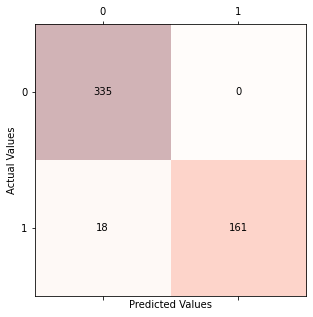

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       335
         1.0       1.00      0.90      0.95       179

    accuracy                           0.96       514
   macro avg       0.97      0.95      0.96       514
weighted avg       0.97      0.96      0.96       514



In [189]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(user_test_label, y_pred ))

In [190]:
# Perform 6-fold cross validation
scores = cross_val_score(model, user_train, user_train_label, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.9502924  0.96491228 0.97953216 0.9619883  0.9619883  0.97660819]


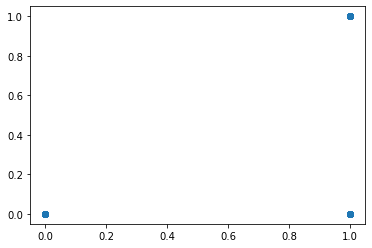

In [191]:
# Make cross validated predictions
predictions = cross_val_predict(model, user_test, user_test_label, cv=6)
plt.scatter(user_test_label, predictions)

In [192]:
accuracy = metrics.r2_score(user_test_label, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.6657049945801718


In [193]:
import seaborn as sns

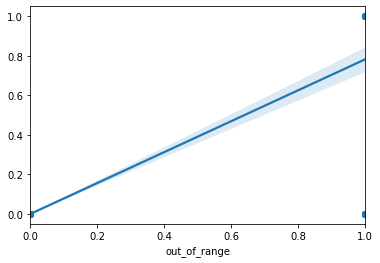

In [194]:
rp = sns.regplot(x=user_test_label, y=predictions)

In [195]:
model_data = label_mergedStuff.copy()

In [196]:
model_data_y = model_data['out_of_range']

In [197]:
model_data_X = model_data.drop(['out_of_range'], axis=1)

In [198]:
model_data.count()

gender                      2566
Age                         2566
city                        2566
Alkaline Phosphatase_res    2566
Bilirubin Total_res         2566
Blood Urea_res              2566
Creatinine_res              2566
HCT_res                     2566
Hemoglobin_res              2566
Lymphocytes_res             2566
Platelet_res                2566
Potassium_res               2566
Red Cells Count(RBC)_res    2566
SGPT (ALT)_res              2566
Sodium_res                  2566
WBC_res                     2566
out_of_range                2566
dtype: int64

In [199]:
feature = ['Alkaline Phosphatase_res','Bilirubin Total_res','Blood Urea_res','Creatinine_res',
            'HCT_res','Hemoglobin_res','Lymphocytes_res','Platelet_res','Potassium_res','Red Cells Count(RBC)_res',
            'SGPT (ALT)_res','Sodium_res','WBC_res']

In [200]:
model_data_X = model_data[feature]

In [201]:
model_final = knc.fit(model_data_X,model_data_y)

In [202]:
user_input = [200,23,20,20,6.1,1.7,0.44,0,0.2,8.61,12,111,5.4]

In [203]:
user_input = pd.DataFrame(user_input).T
user_input

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,200.0,23.0,20.0,20.0,6.1,1.7,0.44,0.0,0.2,8.61,12.0,111.0,5.4


In [204]:
model_final.predict_proba(user_input)

array([[0.36, 0.64]])

In [205]:
model_final.score(user_test,user_test_label)

0.9747081712062257

In [ ]:
import pickle
with open('finaller.pkl', 'wb') as file:
    pickle.dump(model, file)